In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium
import re
base_folder = 'c:\\Users\\jrshs\\OneDrive\\Desktop\\OA3801\\Final Project\\Data' 
sub_folder_pre = 'pre2008engines.csv' 
sub_folder_post = 'engines.csv'
pre_path = os.path.join(base_folder,sub_folder_pre)
post_path = os.path.join(base_folder,sub_folder_post)
df_pre = pd.read_csv(pre_path)
df_post = pd.read_csv(post_path)

display(len(df_pre))
display(len(df_post))

62727

26807

In [2]:
df_engines = pd.concat([df_pre, df_post])
display(df_engines.head())
#df_engines.loc[df_engines['ev_id']=='20080107X00026']
num_aircraft = len(df_engines)
num_ids = df_engines['ev_id'].nunique()
print(f'There are {num_ids} events in df_engines and {num_aircraft} aircraft involved')

,ev_id,Aircraft_Key,eng_no,eng_type,eng_mfgr,eng_model,power_units,hp_or_lbs,lchg_userid,lchg_date,carb_fuel_injection,propeller_type,propeller_make,propeller_model,eng_time_total,eng_time_last_insp,eng_time_overhaul
0,20001213X25852,1,1,REC,CONTINENTAL,C-85-12-F,85.0,HP,NaN,09/20/21 13:49:08,CARB,NaN,NaN,NaN,0,0,0
1,20001211X15972,1,1,REC,CONTINENTAL,IO-520-F13B,300.0,HP,NaN,09/20/21 15:26:21,FINJ,NaN,NaN,NaN,0,0,0
2,20001211X15973,1,1,REC,CONTINENTAL,TSIO-520-VB,325.0,HP,NaN,12/15/21 19:14:26,FINJ,NaN,NaN,NaN,0,0,0
3,20001211X11897,1,1,REC,LYCOMING,O-320-B2B,160.0,HP,NaN,09/20/21 15:26:22,CARB,NaN,NaN,NaN,0,0,0
4,20001211X12053,1,1,REC,CONTINENTAL,IO-520-F,300.0,HP,NaN,09/20/21 16:33:05,FINJ,NaN,NaN,NaN,0,0,0


There are 84135 events in df_engines and 89534 aircraft involved


In [3]:
#Call the two separate files
date_pre = 'pre2008events.csv' 
date_post = 'events.csv'
date_pre_path = os.path.join(base_folder,date_pre)
date_post_path = os.path.join(base_folder,date_post)

#Build two databases with pd.read_csv
df_date_pre = pd.read_csv(date_pre_path,usecols=['ev_id','ev_date','ev_year'])
df_date_post = pd.read_csv(date_post_path,usecols=['ev_id','ev_date','ev_year'])

#Concatenate into one dataframe
df_date = pd.concat([df_date_pre, df_date_post])
display(len(df_date))

C:\Users\jrshs\AppData\Local\Temp\ipykernel_40860\1364230006.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_date_post = pd.read_csv(date_post_path,usecols=['ev_id','ev_date','ev_year'])


92228

In [4]:
import datetime
df_date_engines = pd.merge(df_date, df_engines, on='ev_id', how='left')
display(len(df_date_engines))


null = df_date_engines.loc[df_date_engines['Aircraft_Key'].isnull()].index
df_engine_master = df_date_engines.drop(index=null)
unk = df_engine_master.loc[df_engine_master['eng_type']=='UNK'].index
df_engine_master = df_engine_master.drop(index=unk)
mfg = df_engine_master.loc[df_engine_master['eng_mfgr'].isnull()].index
df_engine_master = df_engine_master.drop(index=mfg)


times = pd.to_datetime(df_engine_master['ev_date'].values)
df_engine_master.ev_date = times
df_engine_master = df_engine_master.sort_values('ev_date')
display(df_engine_master.head())
display(len(df_engine_master))

97255

C:\Users\jrshs\AppData\Local\Temp\ipykernel_40860\1561578342.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  times = pd.to_datetime(df_engine_master['ev_date'].values)


,ev_id,ev_date,ev_year,Aircraft_Key,eng_no,eng_type,eng_mfgr,eng_model,power_units,hp_or_lbs,lchg_userid,lchg_date,carb_fuel_injection,propeller_type,propeller_make,propeller_model,eng_time_total,eng_time_last_insp,eng_time_overhaul
27209,20001218X45448,1977-06-19,1977,1.0,1.0,REC,Lycoming,IO-360-C1D6,200.0,HP,NaN,09/20/21 13:30:39,FINJ,NaN,NaN,NaN,0.0,0.0,0.0
64963,20170710X52551,1979-09-17,1979,1.0,1.0,TF,Pratt & Whitney,JT8D-7,NaN,NaN,broda,09/25/20 13:53:04,NaN,NaN,NaN,NaN,16950.0,0.0,2359.0
64964,20170710X52551,1979-09-17,1979,1.0,2.0,TF,Pratt & Whitney,JT8D-7,NaN,NaN,broda,09/25/20 13:53:04,NaN,NaN,NaN,NaN,22087.0,0.0,3629.0
9647,20001218X45446,1981-08-01,1981,1.0,1.0,REC,CONTINENTAL,O-470-K,230.0,HP,NaN,09/22/21 16:57:27,CARB,NaN,NaN,NaN,0.0,0.0,0.0
61359,20020909X01559,1982-01-01,1982,1.0,1.0,REC,LYCOMING,O-320-D3G,160.0,HP,NaN,09/02/21 18:10:22,CARB,NaN,NaN,NaN,0.0,0.0,0.0


84869

In [5]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

df_engine_master['eng_mfgr'] = (
    df_engine_master['eng_mfgr']
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
)

alias_map = {
    "lycoming": "Lycoming",
    "Textron Lycoming": "Lycoming",
    "LYCOMING": "Lycoming",
    "avco lycoming": "Lycoming",
    "textron lyc.": "Lycoming",
    "Lycoming Engines": "Lycoming",
    "Avco Lycoming": "Lycoming",
    "continental": "Continental",
    "CONTINENTAL": "Continental",
    "cont motor": "Continental",
    "teledyne continental": "Continental",
    "CONT MOTOR": "Continental",
    "Continental Motors": "Continental",
    "Contiental Motors": "Continental",
    "Teledyne Continental": "Continental",
    "Teledyne Continental Motors": "Continental",
    "Teledyne continental Motors": "Continental",
    "Contenental Teledyne": "Continental",
    "pratt & whitney": "Pratt & Whitney",
    "pratt and whitney": "Pratt & Whitney",
    "p&w": "Pratt & Whitney",
    "P&W": "Pratt & Whitney",
    "p&w canada": "Pratt & Whitney",
    "Pratt & Whitney Canada": "Pratt & Whitney",
    "P&W CANADA": "Pratt & Whitney",
    "P & W": "Pratt & Whitney",
    "Pratt and Whitney": "Pratt & Whitney",
    "Pratt &Whitney Canada": "Pratt & Whitney",
    "Pratt & WhitneyCanada": "Pratt & Whitney",
    "P&W Canada": "Pratt & Whitney",
    "Pratt &Whitney": "Pratt & Whitney",
    "rolls-royc": "Rolls-Royce",
    "rolls royce": "Rolls-Royce",
    "Rolls Royce": "Rolls-Royce",
    "ROLLS-ROYC": "Rolls-Royce",
    "ROLLS-ROYCE": "Rolls-Royce",
    "ge": "General Electric",
    "general electric": "General Electric",
    "GE": "General Electric",
    "General Electic": "General Electric",
    "ROTAX": "Rotax",
    "ALLISON": "Allison",
    "FRANKLIN": "Franklin",
    "GARRETT": "Garrett",
    "TURBOMECA": "Turbomeca",
    "VOLKSWAGEN": "Volkswagen",
    "JACOBS": "Jacobs",
    "WRIGHT": "Wright",
    "CFM INTL.": "CFM International",
    "CFM INTL": "CFM International",
    "CFM": "CFM International",
    "AIRESEARCH": "Airesearch",
    "ROTORWAY": "Rotorway"
}

#set values manufacturer values for df_engine_master using the alias map and replace method for the string module.  Prepare to further refine by creating an array of all the unique manufacturer values
#and a list of all the accepted values
df_engine_master["eng_mfgr"] = df_engine_master["eng_mfgr"].replace(alias_map)
manufacturers = df_engine_master['eng_mfgr'].unique()
eng_mfgrs = df_engine_master['eng_mfgr'].value_counts()
Man_accepted = eng_mfgrs.index[:25]

#Identify how each unique value in df_engine_master compares to the accepted values
matches = [(m,process.extractOne(m,Man_accepted)) for m in manufacturers]
matches_sorted = sorted(matches,key=lambda x: x[1][1],reverse=True)
display(matches_sorted)
# for mfgr in eng_mfgrs.index:
#     print(f'{mfgr}: {eng_mfgrs[mfgr]}')

#df_engine_master.to_csv('engines_master.csv')

c:\Users\jrshs\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


[('Lycoming', ('Lycoming', 100)),
 ('Pratt & Whitney', ('Pratt & Whitney', 100)),
 ('Continental', ('Continental', 100)),
 ('Allison', ('Allison', 100)),
 ('Franklin', ('Franklin', 100)),
 ('Turbomeca', ('Turbomeca', 100)),
 ('ROLLS ROYCE', ('Rolls-Royce', 100)),
 ('Airesearch', ('Airesearch', 100)),
 ('Wright', ('Wright', 100)),
 ('General Electric', ('General Electric', 100)),
 ('Rolls-Royce', ('Rolls-Royce', 100)),
 ('Volkswagen', ('Volkswagen', 100)),
 ('Rotorway', ('Rotorway', 100)),
 ('Garrett', ('Garrett', 100)),
 ('REVMASTER', ('REVMASTER', 100)),
 ('Jacobs', ('Jacobs', 100)),
 ('CUYUNA', ('CUYUNA', 100)),
 ('HIRTH', ('Hirth', 100)),
 ('Rotax', ('Rotax', 100)),
 ('Revmaster', ('REVMASTER', 100)),
 ('Cuyuna', ('CUYUNA', 100)),
 ('BOMBARDIER', ('Bombardier', 100)),
 ('CFM International', ('CFM International', 100)),
 ('Bombardier', ('Bombardier', 100)),
 ('Subaru', ('Subaru', 100)),
 ('SUBARU', ('Subaru', 100)),
 ('Hirth', ('Hirth', 100)),
 ('Jabiru', ('Jabiru', 100)),
 ('Honeywe

In [6]:
#Based on the above results with the standard Wratio solver, a score of 74 is a sufficient match with the exception of Barret Precision Engines which I can manually fix. Takes about 3 minutes to run.
def mfgr_match(name, accepted, threshold=74):
    """Takes a list or list like object (array) and a list of accepted names and compares them using the fuzzywuzzy module.  If the score is greater than 74, returns the accepted name."""
    match, score = process.extractOne(name, accepted)
    if score >= threshold:
        return match
    else:
        return name
    
df_engine_master['eng_mfgr'] = df_engine_master['eng_mfgr'].apply(
    lambda x: mfgr_match(x, Man_accepted)
)

display(df_engine_master.head())

,ev_id,ev_date,ev_year,Aircraft_Key,eng_no,eng_type,eng_mfgr,eng_model,power_units,hp_or_lbs,lchg_userid,lchg_date,carb_fuel_injection,propeller_type,propeller_make,propeller_model,eng_time_total,eng_time_last_insp,eng_time_overhaul
27209,20001218X45448,1977-06-19,1977,1.0,1.0,REC,Lycoming,IO-360-C1D6,200.0,HP,NaN,09/20/21 13:30:39,FINJ,NaN,NaN,NaN,0.0,0.0,0.0
64963,20170710X52551,1979-09-17,1979,1.0,1.0,TF,Pratt & Whitney,JT8D-7,NaN,NaN,broda,09/25/20 13:53:04,NaN,NaN,NaN,NaN,16950.0,0.0,2359.0
64964,20170710X52551,1979-09-17,1979,1.0,2.0,TF,Pratt & Whitney,JT8D-7,NaN,NaN,broda,09/25/20 13:53:04,NaN,NaN,NaN,NaN,22087.0,0.0,3629.0
9647,20001218X45446,1981-08-01,1981,1.0,1.0,REC,Continental,O-470-K,230.0,HP,NaN,09/22/21 16:57:27,CARB,NaN,NaN,NaN,0.0,0.0,0.0
61359,20020909X01559,1982-01-01,1982,1.0,1.0,REC,Lycoming,O-320-D3G,160.0,HP,NaN,09/02/21 18:10:22,CARB,NaN,NaN,NaN,0.0,0.0,0.0


In [7]:
df_engine_master.to_csv('engines_master.csv')

In [8]:
#Use pivot table to create a new df that contains the number of incidences for each unique engine manufacturer by year
df_mfg_year = df_engine_master.pivot_table(index='ev_year', columns='eng_mfgr', aggfunc='size', fill_value=0).astype(int)
df_mfg_1980 = df_mfg_year.drop(df_mfg_year[df_mfg_year.index < 1980].index)
c_sum = df_mfg_1980.cumsum(axis=0).iloc[-1]
c_sort = c_sum.sort_values(ascending=False)
df_mfg_sorted = df_mfg_1980[c_sort.index]
df_mfg_sorted.head()
df_mfg_top = df_mfg_sorted.iloc[:,0:5]
df_mfg_top.head()

eng_mfgr,Lycoming,Continental,Pratt & Whitney,Rotax,Allison
ev_year,,,,,
1981,0,1,0,0,0
1982,1673,1224,262,0,88
1983,1573,1158,264,32,98
1984,1524,1131,250,39,111
1985,1429,1055,200,11,91


<Figure size 640x480 with 0 Axes>

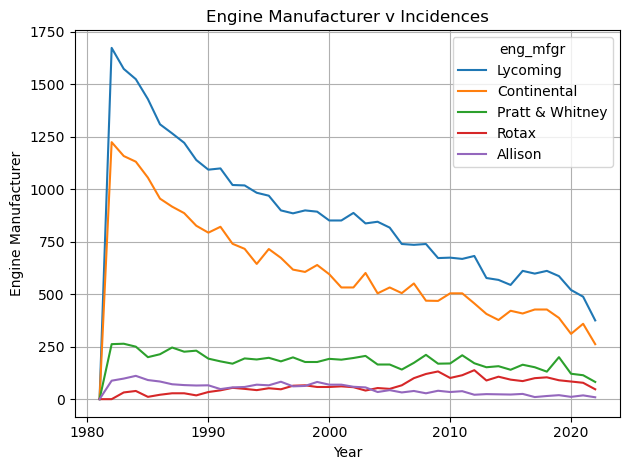

In [19]:
fig1 = plt.figure(1)
df_mfg_top.plot(kind='line',title='Engine Manufacturer v Incidences',xlabel='Year',ylabel='Engine Manufacturer')
plt.tight_layout()
plt.grid(True)
plt.show()

In [10]:
#Pull in the Occurence code data from the pre2008Occurences.csv and Event_Sequence.csv files and create a new df of just the ev_id and occurence codes.  this is done in the same manner as the date info from earlier.
soe_pre = 'pre2008Occurrences.csv' 
soe_post = 'Events_Sequence.csv'
soe_pre_path = os.path.join(base_folder,soe_pre)
soe_post_path = os.path.join(base_folder,soe_post)
df_soe_pre = pd.read_csv(soe_pre_path,usecols=['ev_id','Occurrence_Code'])
df_soe_post = pd.read_csv(soe_post_path,usecols=['ev_id','Occurrence_Code'])
df_soe = pd.concat([df_soe_pre, df_soe_post])
df_soe.head()

,ev_id,Occurrence_Code
0,20001204X00055,230
1,20001204X00056,350
2,20001204X00056,180
3,20001204X00056,220
4,20001204X00057,350


In [11]:
#merge df_engine_master and df_soe above to create a new column called 'Occurrence_Code.'
df_engine_master = pd.merge(df_engine_master, df_soe, on='ev_id', how='left')
df_engine_master.to_csv('engines_master.csv')
print(f'There are {len(df_engine_master)} events in df_master.')

There are 196364 events in df_master.


In [12]:
null = df_engine_master.loc[df_engine_master['Occurrence_Code'].isnull()].index
df_engine_drop = df_engine_master.drop(index=null)

#filter the results from the pre-2008 records down to just the last three digits
df_engine_drop['Occurrence_Code'] = df_engine_drop['Occurrence_Code'] % 1000
df_engine_drop['Occurrence_Code'] = df_engine_drop['Occurrence_Code'].astype(int)
print(f'There are {len(df_engine_drop)} after dropping the events with no occurrence code.')

There are 196172 after dropping the events with no occurrence code.


In [13]:
#create a new df that only contains the codes for mechanical engine failure (351 and 352)
df_engine_code = df_engine_drop[(df_engine_master['Occurrence_Code'] == 351)|
                               (df_engine_master['Occurrence_Code'] == 352)]
#df_engine_code = df_engine_master.drop(index=null_code)
print(f'There are {len(df_engine_code)} events after filtering out all events not related to full or partial engine failure.')

There are 4508 events after filtering out all events not related to full or partial engine failure.


C:\Users\jrshs\AppData\Local\Temp\ipykernel_40860\394549463.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_engine_code = df_engine_drop[(df_engine_master['Occurrence_Code'] == 351)|


In [14]:
#Use pivot table to create a new df that contains the number of incidences for each unique engine manufacturer by year
df_mfg_fail = df_engine_code.pivot_table(index='ev_year', columns='eng_mfgr', aggfunc='size', fill_value=0).astype(int)
df_mfg_fail = df_mfg_fail.drop(df_mfg_fail[df_mfg_fail.index < 1980].index)
c_sum_fail = df_mfg_fail.cumsum(axis=0).iloc[-1]
c_sort_fail = c_sum_fail.sort_values(ascending=False)
df_mfg_fail_sorted = df_mfg_fail[c_sort_fail.index]
df_mfg_fail_sorted.head()
df_mfg_fail_top = df_mfg_fail_sorted.iloc[:,0:5]
df_mfg_fail_top.head()

eng_mfgr,Lycoming,Continental,Pratt & Whitney,Allison,Rotax
ev_year,,,,,
1982,108,80,30,15,0
1983,94,66,39,14,4
1984,87,58,47,14,2
1985,100,79,28,15,0
1986,97,59,22,9,3


<Figure size 640x480 with 0 Axes>

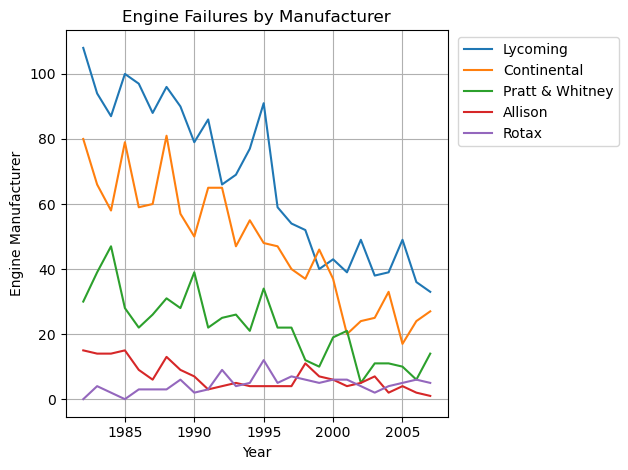

In [18]:
fig2 = plt.figure(2)
ax = df_mfg_fail_top.plot(kind='line',title='Engine Failures by Manufacturer',xlabel='Year',ylabel='Engine Manufacturer')
ax.legend(bbox_to_anchor=(1.01,1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()